In [1]:
import numpy as np
import blimpy as bl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

numexpr.utils   INFO     Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
numexpr.utils   INFO     NumExpr defaulting to 8 threads.


In [2]:
cci = np.load('/datax/scratch/benjb/C23_L_non_anom_centroid_idxs.npy', allow_pickle=True)
ccc = np.load('/datax/scratch/benjb/C23_L_non_anom_centroids.npy', allow_pickle=True)

kmeans_labels = np.load('/datax/scratch/benjb/C23_L_kmeans_labels.npy')

In [3]:
hit_params = np.load('/datax/scratch/benjb/C23_L_unique_param_array.npy', allow_pickle=True)
hit_dats = np.load('/datax/scratch/benjb/C23_L_unique_dat_list.npy', allow_pickle=True)[:,1]

In [ ]:
### NEED A WAY TO LINK TO CORRESPONDING .H5 FILES — CARMEN'S CSV?

In [4]:
df = pd.read_csv('/home/cgchoza/galaxies/complete_cadences_catalog.csv')

In [6]:
h5s = df['.h5 path'].values
print(len(h5s))
print(len(np.unique(h5s)))

36558
30314


In [8]:
dats = df['.dat path'].values
print(len(dats))
print(len(np.unique(dats)))

36558
30314


In [11]:
hit_h5s = []
h5_list = np.unique(df['.h5 path'].values)
dat_list = np.unique(df['.dat path'].values)

for i, dat in enumerate(hit_dats):
    if i%10000 == 0:
        print(f'Working on {i}')
    idx = np.where(dat_list == dat)[0]
    h5 = h5_list[idx]
    hit_h5s.append(h5)

Working on 0
Working on 10000
Working on 20000
Working on 30000
Working on 40000
Working on 50000
Working on 60000
Working on 70000
Working on 80000
Working on 90000
Working on 100000
Working on 110000
Working on 120000
Working on 130000
Working on 140000
Working on 150000
Working on 160000
Working on 170000
Working on 180000
Working on 190000
Working on 200000
Working on 210000
Working on 220000
Working on 230000
Working on 240000
Working on 250000
Working on 260000
Working on 270000
Working on 280000
Working on 290000
Working on 300000
Working on 310000
Working on 320000
Working on 330000
Working on 340000
Working on 350000
Working on 360000
Working on 370000
Working on 380000
Working on 390000
Working on 400000
Working on 410000
Working on 420000
Working on 430000
Working on 440000
Working on 450000
Working on 460000
Working on 470000
Working on 480000
Working on 490000
Working on 500000
Working on 510000
Working on 520000
Working on 530000
Working on 540000
Working on 550000
Workin

In [12]:
hit_h5s = np.array(hit_h5s)
print(hit_h5s.shape)

(1917903, 1)


In [15]:
print(np.squeeze(hit_h5s)[0])

/datag/pipeline/AGBT21A_996_47/blc06/blc06_guppi_59405_66861_LeoA_0096.rawspec.0000.h5


In [16]:
np.save('/datax/scratch/benjb/C23_L_unique_h5_list.npy', np.squeeze(hit_h5s))

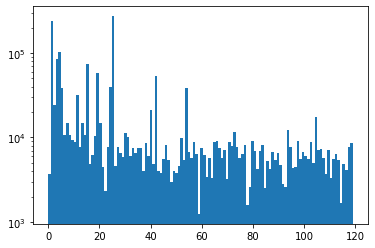

In [20]:
### k-means labeling

plt.hist(kmeans_labels, bins=120)
plt.yscale('log')
plt.show()

In [ ]:
# random_assortment_of_labels = np.random.randint(0, 120, 20)

# for label in random_assortment_of_labels:
#     pick 100 signals with that label
#     plot them
#     ...